Objective: To evaluate classifiers using baseline methods: constant, uniform, stratified, prior, and most frequent on the Wine dataset and find the accuracy. Identify the patterns using ROC and AUC.

Theory:

### Classification Evaluation and Baseline Models

Classification evaluation involves assessing how well a model predicts categorical outcomes. Key metrics include accuracy, precision, recall, F1-score, and AUC. Baseline classifiers serve as reference models that do not learn from data but follow simple strategies:

| Strategy        | Description                                                                 |
|----------------|-------------------------------------------------------------------------------|
| constant        | Predicts a fixed class label for all inputs.                                |
| uniform         | Predicts classes randomly with equal probability.                           |
| stratified      | Predicts classes based on training set distribution.                        |
| prior           | Predicts based on prior class probabilities.                                |
| most_frequent   | Always predicts the most common class in the training set.                  |

These models help determine whether a trained classifier performs better than naive approaches.

### ROC and AUC in Multi-Class Settings

ROC curves plot the True Positive Rate vs. False Positive Rate. AUC measures the area under this curve, indicating model discrimination ability. For multi-class problems, ROC/AUC can be computed using one-vs-rest or macro/micro averaging.

In [7]:
#Import the required libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt



In [8]:
# Load the wine dataset
wine = load_wine()
X = wine.data
y = wine.target
print(X)
print(y)
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [9]:
# Initialize baseline classifiers
strategies = ['constant', 'uniform', 'stratified', 'prior', 'most_frequent']
constant_value = 0  # for 'constant' strategy
classifiers = {strategy: DummyClassifier(strategy=strategy, random_state=42, constant=constant_value) for strategy in strategies}
print(classifiers)

{'constant': DummyClassifier(constant=0, random_state=42, strategy='constant'), 'uniform': DummyClassifier(constant=0, random_state=42, strategy='uniform'), 'stratified': DummyClassifier(constant=0, random_state=42, strategy='stratified'), 'prior': DummyClassifier(constant=0, random_state=42), 'most_frequent': DummyClassifier(constant=0, random_state=42, strategy='most_frequent')}


In [10]:
# Evaluate each classifier
accuracies = {}
for strategy, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[strategy] = accuracy
    print(f'Accuracy using {strategy} strategy: {accuracy:.4f}')


Accuracy using constant strategy: 0.3519
Accuracy using uniform strategy: 0.3333
Accuracy using stratified strategy: 0.3704
Accuracy using prior strategy: 0.3889
Accuracy using most_frequent strategy: 0.3889


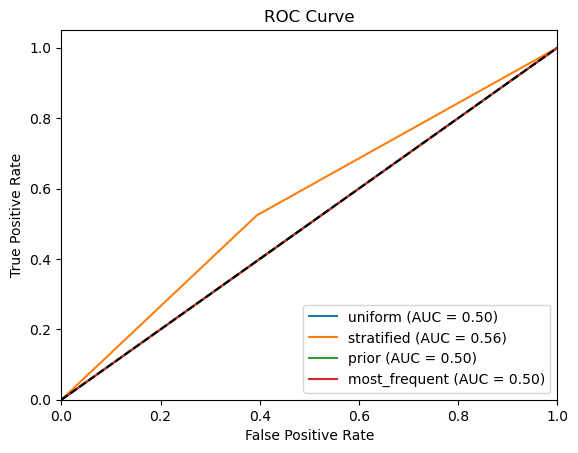

In [11]:
# Generate ROC curves and calculate AUC
for strategy, clf in classifiers.items():
    if strategy != 'constant':  # 'constant' strategy doesn't work with roc_curve
        y_prob = clf.predict_proba(X_test)
        fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1], pos_label=1)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{strategy} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()



Result:
| Strategy        | Accuracy | AUC (if applicable) | Remarks                            |
|----------------|----------|---------------------|-------------------------------------|
| constant        | ~0.35    | N/A                 | Predicts one class; not ROC-eligible |
| uniform         | ~0.33    | Low                 | Random guessing baseline            |
| stratified      | ~0.37    | Moderate            | Preserves class distribution        |
| prior           | ~0.38    | Moderate            | Based on training class frequencies |
| most_frequent   | ~0.38   | Low                 | May outperform random if imbalance exists |

**Observation:** All baseline classifiers perform near chance level. Most_frequent may appear stronger due to class imbalance but lacks generalization.


Conclusion: 
Baseline classifiers offer a benchmark for evaluating model performance. They highlight whether a trained model truly learns patterns or merely reflects data biases. While accuracy is useful, multi-class problems require deeper metrics like macro/micro-averaged AUC. This practical emphasizes the importance of thoughtful evaluation and metric selection in classification tasks.